In [45]:
# Imports and initialization
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import torch
import torch.optim as optim
torch.set_printoptions(edgeitems=2, linewidth=75)

In [46]:
# Model wrapper to call linear or quadratic model as needed
def model(t_u, params):
    if len(params) == 2:
        return model_lin(t_u, *params)
    elif len(params) == 3:
        return model_quad(t_u, *params)
    else:
        return None

# Linear (baseline) model
def model_lin(t_u, w, b):
    return w*t_u + b

# Quadratic model
def model_quad(t_u, w2, w1, b):
    return w2*t_u**2 + w1*t_u + b

# Simple MSE loss function
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [47]:
# Dataset
t_c = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0,
                    8.0, 3.0, -4.0, 6.0, 13.0, 21.0])
t_u = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9,
                    33.9, 21.8, 48.4, 60.4, 68.4])
t_un = 0.1 * t_u

In [48]:
# Constant hyperparameters
lr = 1e-2
n = 5000

In [49]:
# Training loop from textbook with addition of loss tracking
def training_loop(n_epochs, optimizer, params, t_u, t_c):
    losses = []
    for epoch in range(1, n_epochs + 1):
        t_p = model(t_u, params) 
        loss = loss_fn(t_p, t_c)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            losses.append((epoch, loss))
            
    return params, losses

In [50]:
# Run linear with Adam
params = torch.tensor([1.0, 0.0], requires_grad=True)
optimizer = optim.Adam([params], lr=lr)

params_lin_Adam, loss_lin_Adam = training_loop(
    n_epochs = n, 
    optimizer = optimizer,
    params = params,
    t_u = t_un,
    t_c = t_c)

Epoch 500, Loss 24.946461
Epoch 1000, Loss 15.752771
Epoch 1500, Loss 9.455151
Epoch 2000, Loss 5.767541
Epoch 2500, Loss 3.932838
Epoch 3000, Loss 3.196812
Epoch 3500, Loss 2.977151
Epoch 4000, Loss 2.933181
Epoch 4500, Loss 2.927968
Epoch 5000, Loss 2.927654


In [51]:
# Run quadratic with Adam
params = torch.tensor([0.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.Adam([params], lr=lr)

params_quad_Adam, loss_quad_Adam = training_loop(
    n_epochs = n,
    optimizer = optimizer,
    params = params,
    t_u = t_un,
    t_c = t_c)

Epoch 500, Loss 3.535804
Epoch 1000, Loss 2.841011
Epoch 1500, Loss 2.733004
Epoch 2000, Loss 2.610180
Epoch 2500, Loss 2.482250
Epoch 3000, Loss 2.361174
Epoch 3500, Loss 2.258173
Epoch 4000, Loss 2.180982
Epoch 4500, Loss 2.131480
Epoch 5000, Loss 2.105383


In [52]:
# Generate points to visualize models
x = np.linspace(2, 8, 200) # 200 points from 2 to 8 (20 to 80, * 0.1)
t_p_lin_Adam = model(x, params_lin_Adam.detach())
t_p_quad_Adam = model(x, params_quad_Adam.detach())

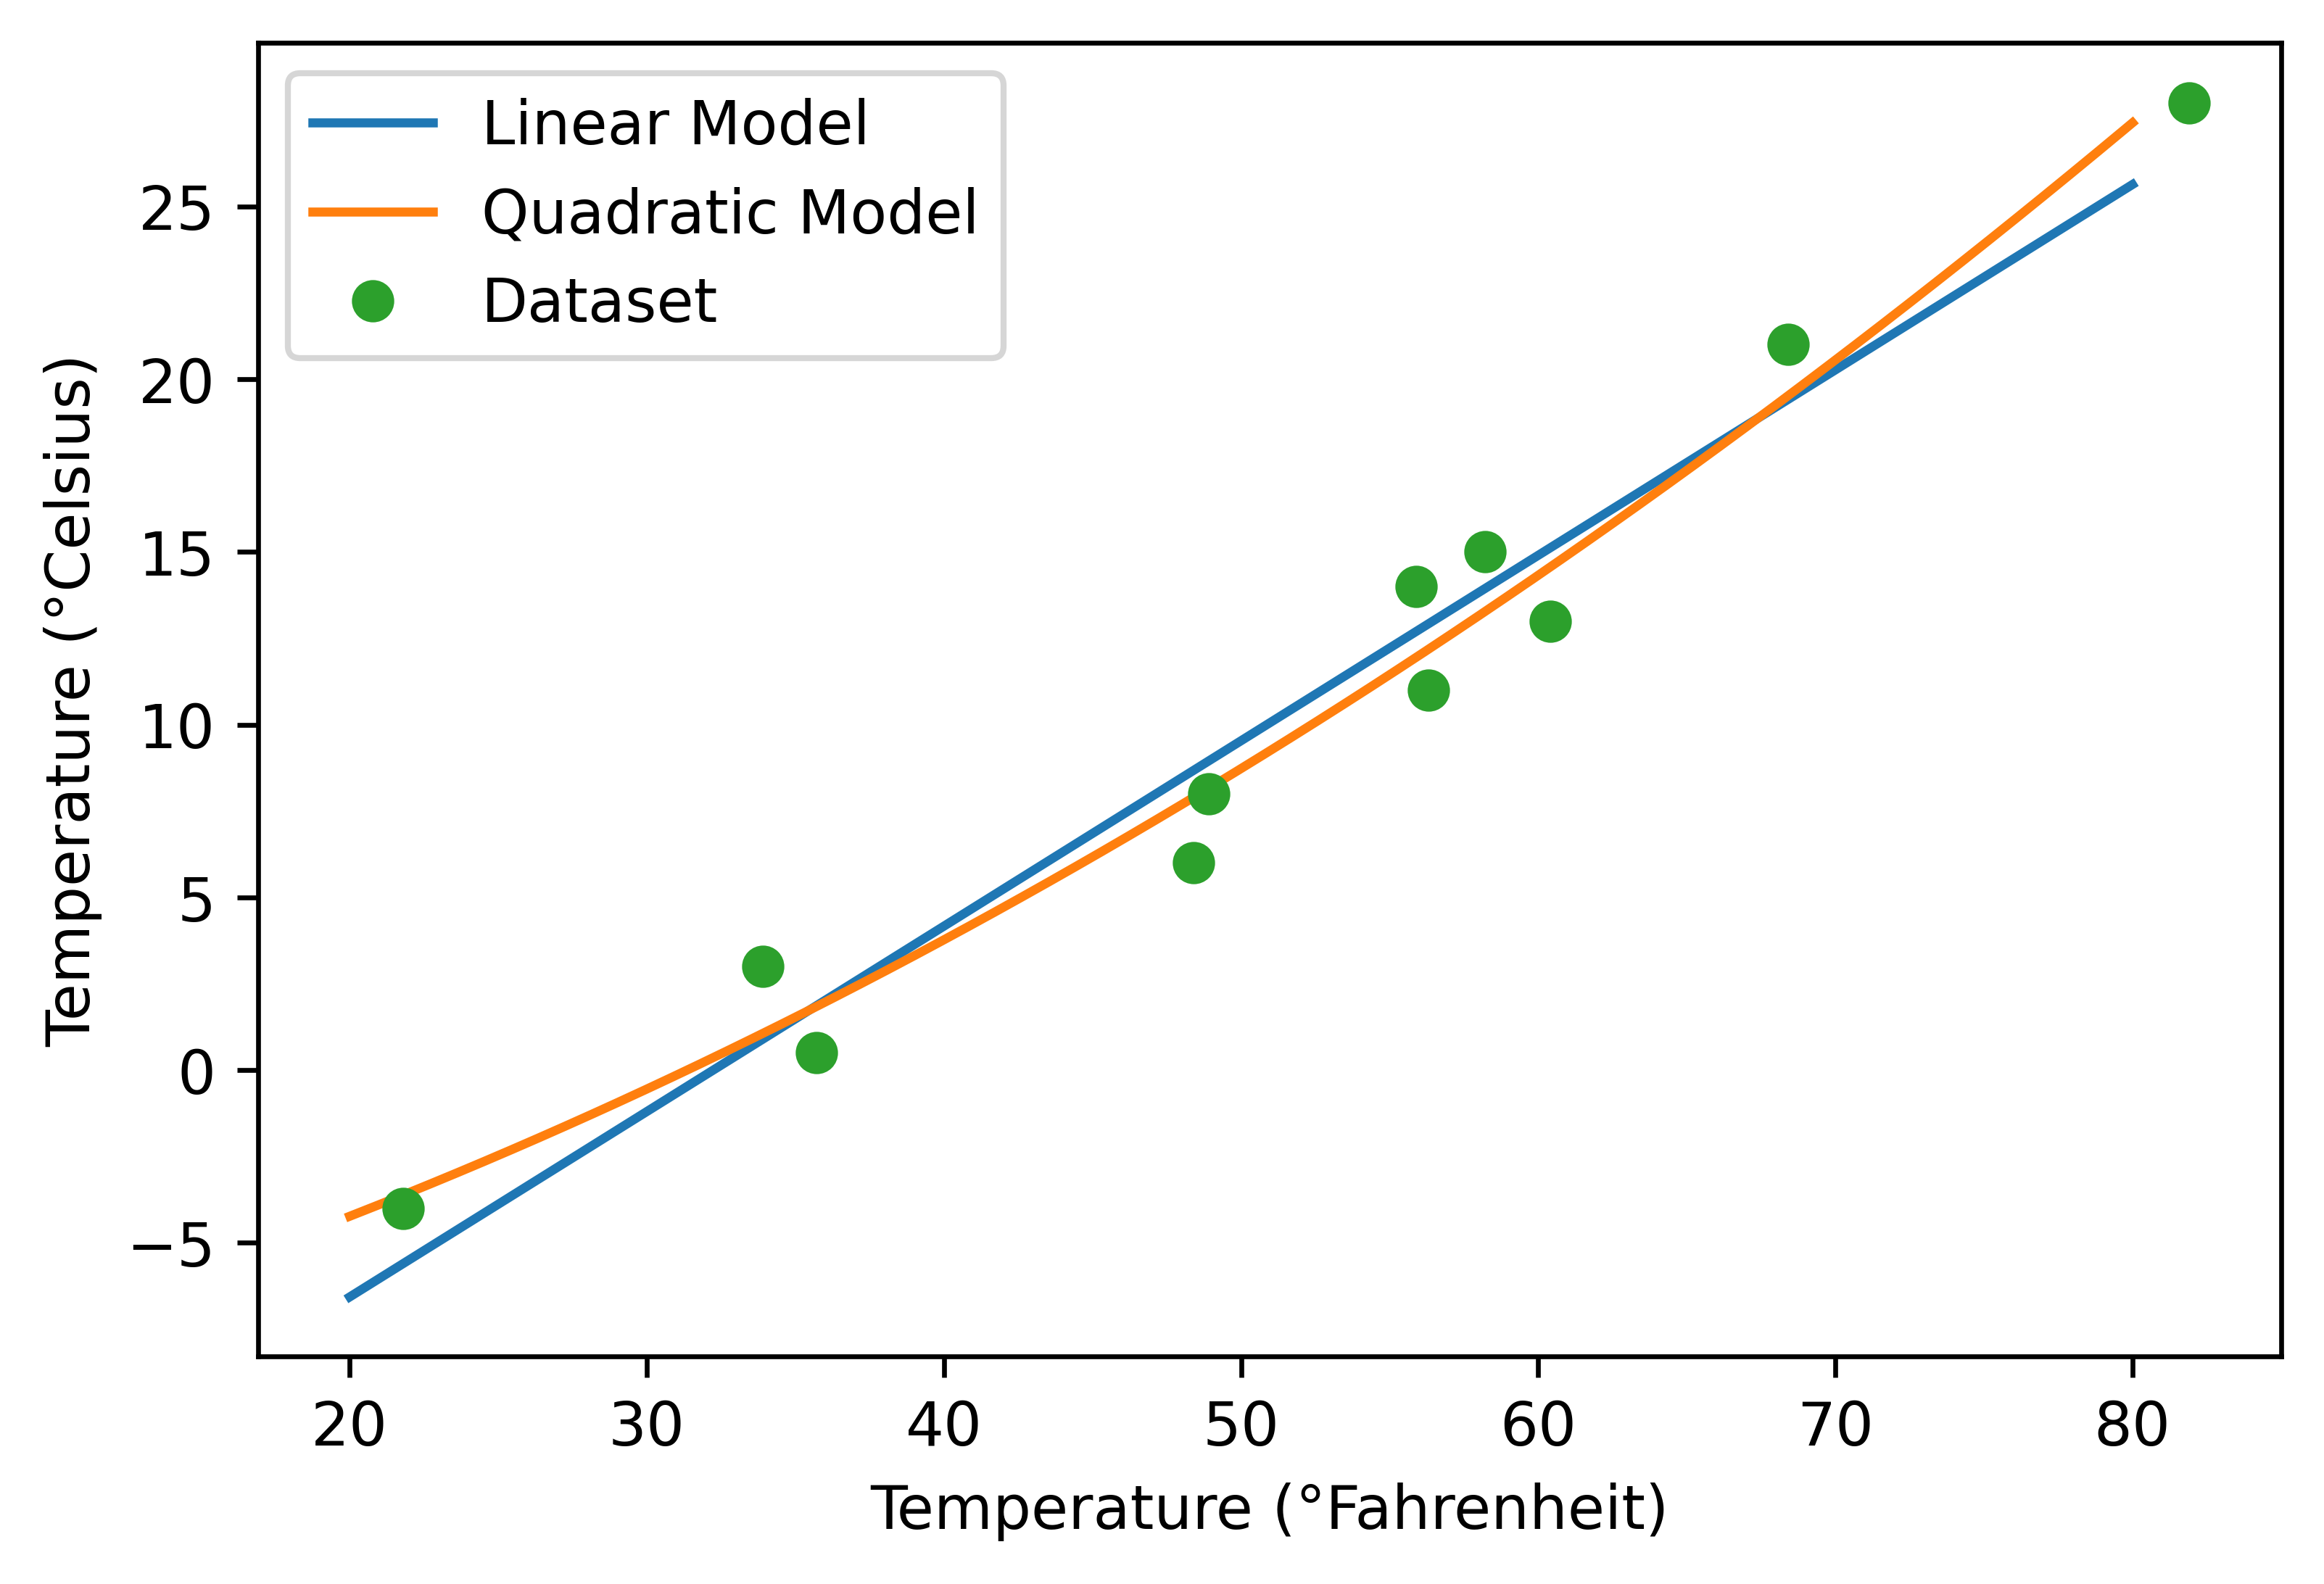

In [56]:
# Set up figure for model outputs
fig = plt.figure(dpi=600)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
lin, = plt.plot(x*10, t_p_lin_Adam.detach().numpy())  # Plot linear model
quad, = plt.plot(x*10, t_p_quad_Adam.detach().numpy()) # Plot quadratic model
data, = plt.plot(t_u.numpy(), t_c.numpy(), 'o')        # Plot dataset
plt.legend([lin, quad, data], ['Linear Model', 'Quadratic Model', 'Dataset'])
plt.savefig("Adam results.png", format="png")

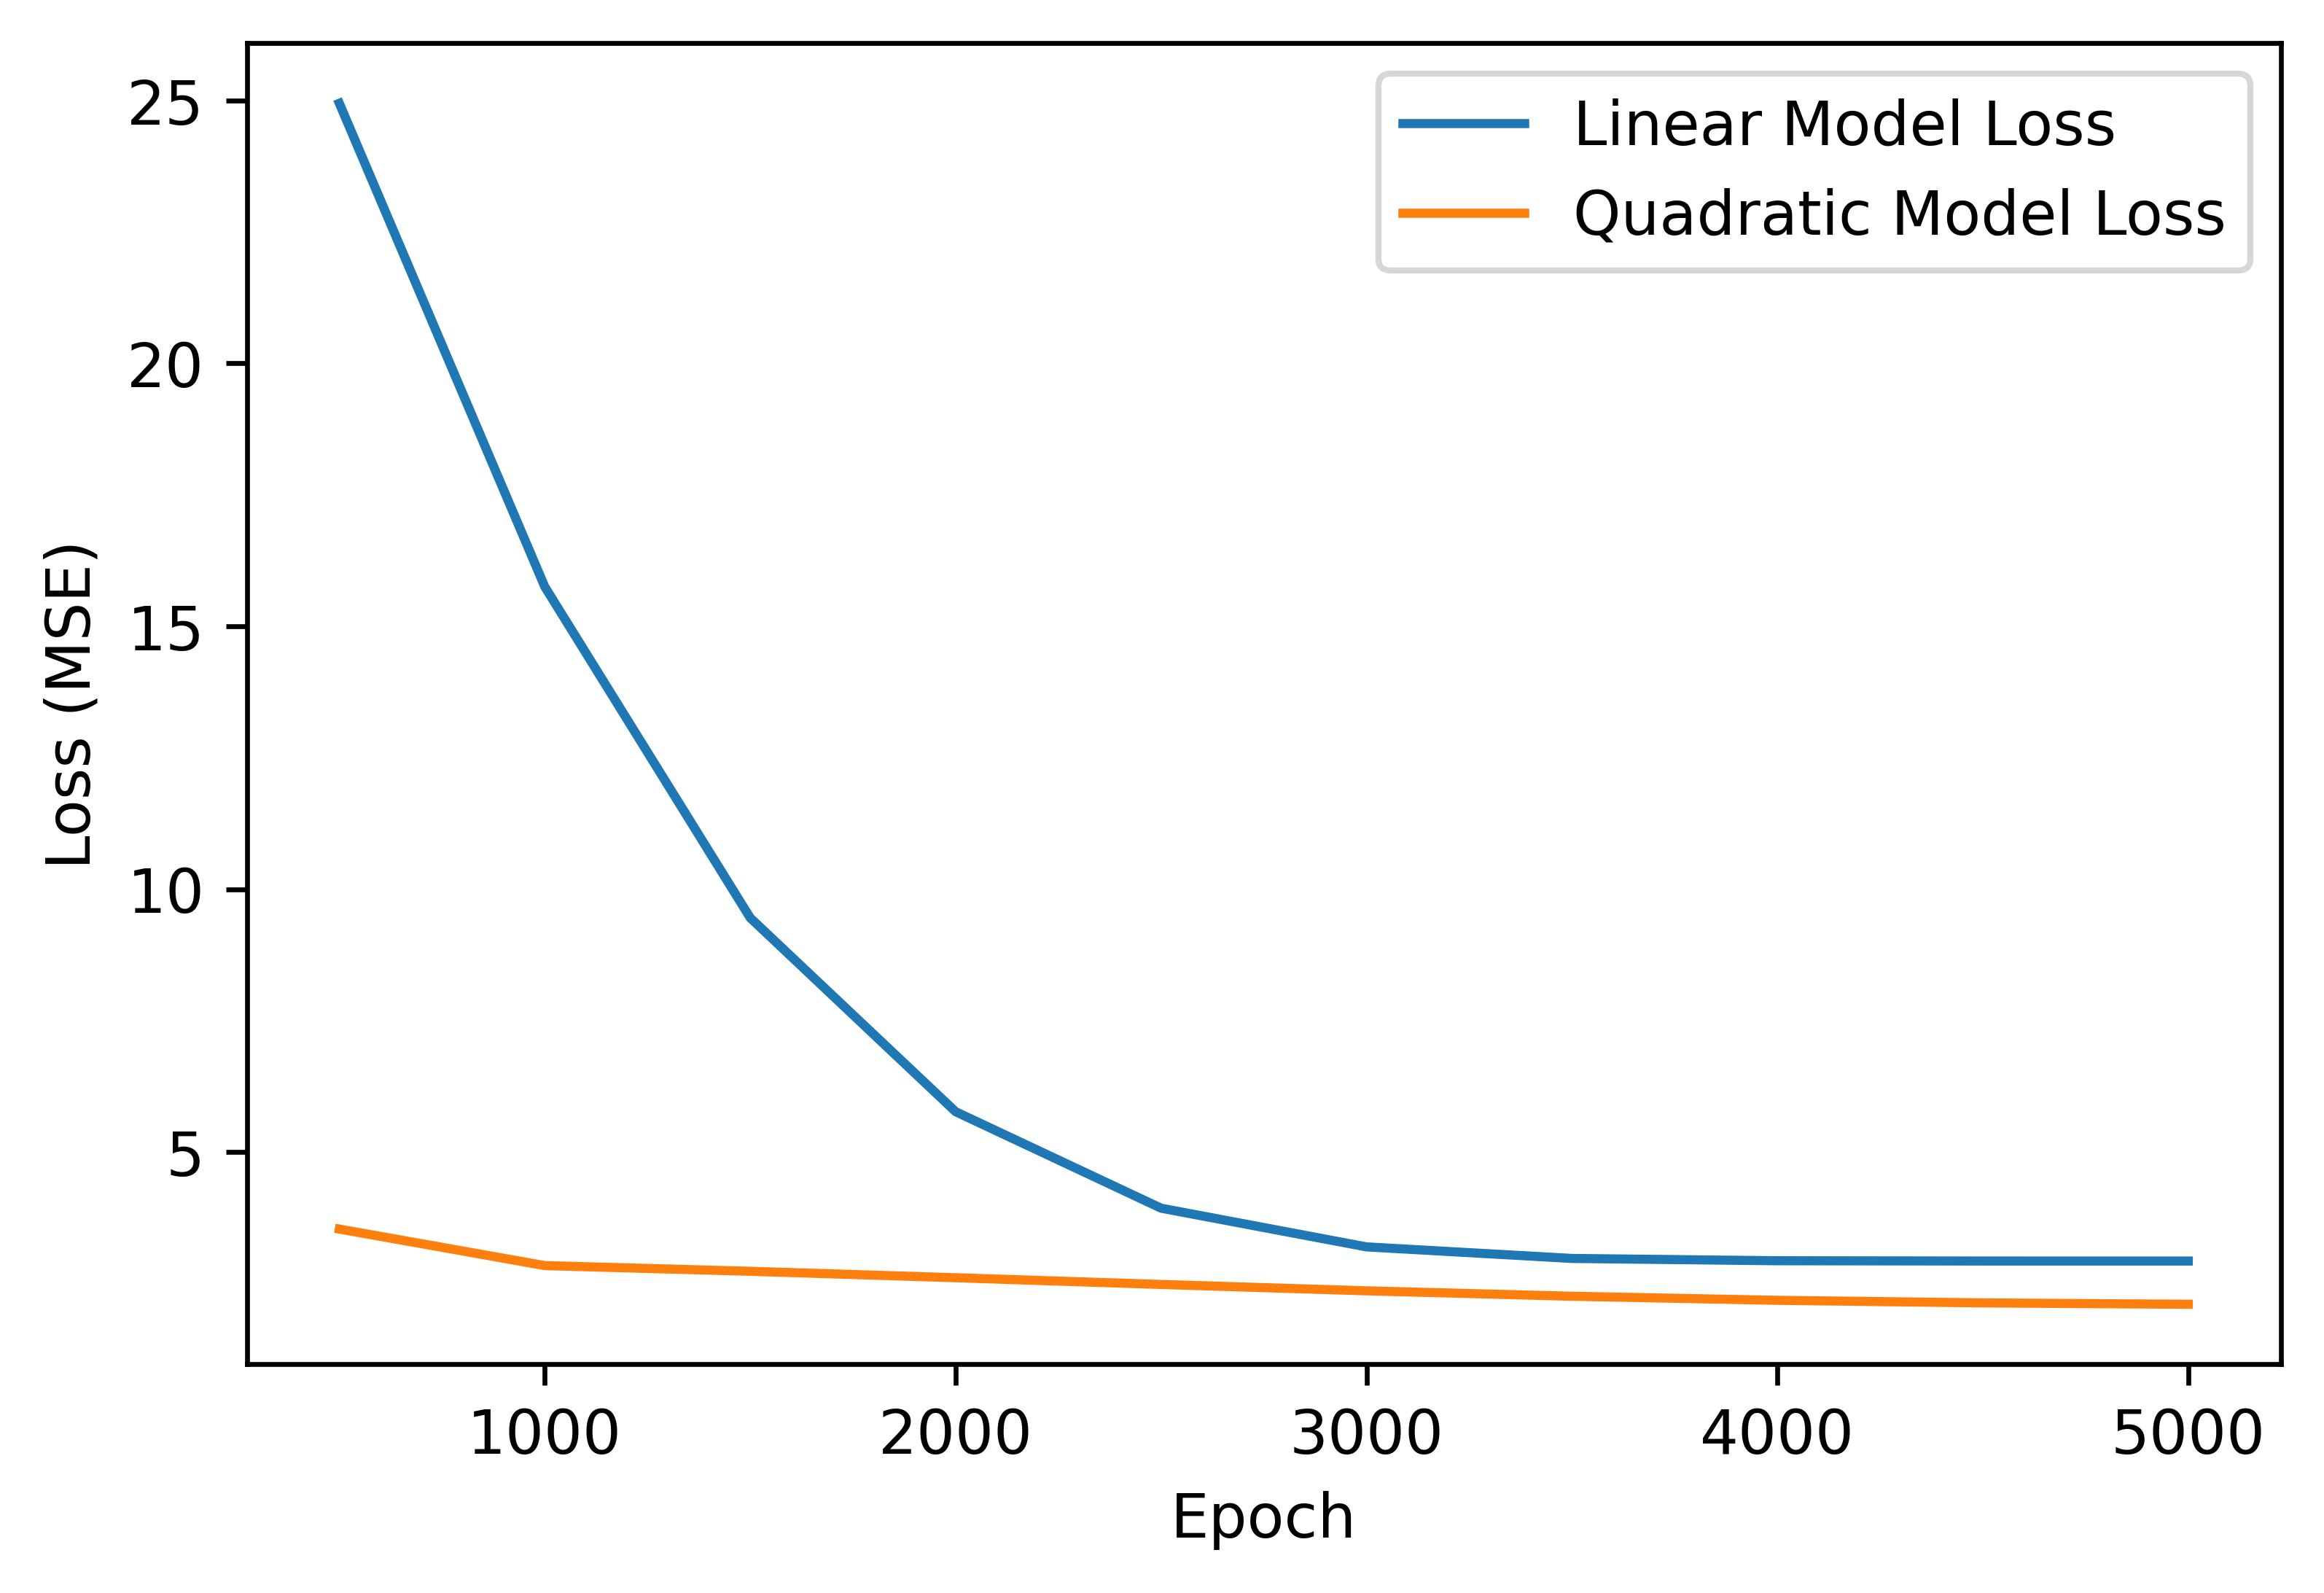

In [63]:
# Set up figure for loss visualization
fig = plt.figure(dpi=600)
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
lin, = plt.plot(*zip(*loss_lin_Adam))  # Plot linear loss
quad, = plt.plot(*zip(*loss_quad_Adam)) # Plot quadratic loss
plt.legend([lin, quad], ['Linear Model Loss', 'Quadratic Model Loss'])
plt.savefig("Adam loss.png", format="png")